## How well do jobs and skills pay for Data Science in the US

### Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Science
3. Visualise for highest paying skills and most demanded skills

In [33]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Set Universal Theme
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [38]:
# Getting the top 6 paying data paying jobs in the US.

df_us = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

In [39]:
job_titles = df_us['job_title_short'].value_counts().index[:6].to_list()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [44]:
top_6 = df_us[df_us['job_title_short'].isin(job_titles)]

In [55]:
job_order = top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

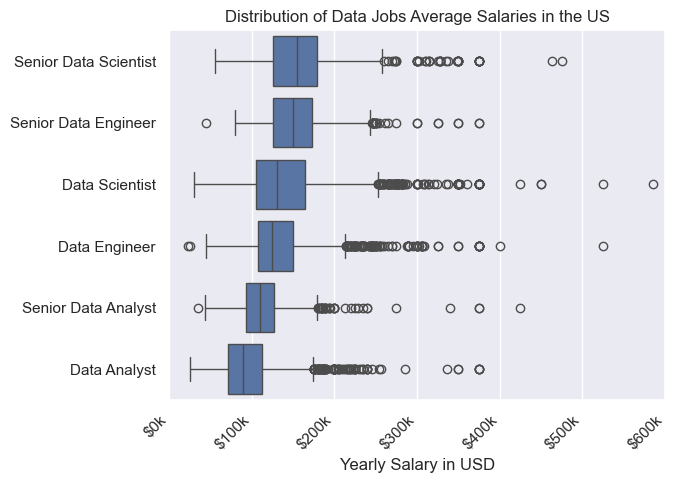

In [58]:
sns.boxplot(data=top_6, x="salary_year_avg", y="job_title_short", order=job_order)
plt.xlabel("Yearly Salary in USD")
plt.ylabel("")  # Set y-axis label
plt.title("Distribution of Data Jobs Average Salaries in the US")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k') # Create a varible to format the salary
plt.gca().xaxis.set_major_formatter(ticks_x) #Use the varible with the set_major_formatter method
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.show()

# Investigate Median Salary vs Skill for Data Scientists

In [80]:
df_ds = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset=['salary_year_avg']).copy()

In [81]:
df_ds = df_ds.explode('job_skills')

df_ds[['job_skills', 'salary_year_avg']].head(5)

,job_skills,salary_year_avg
100,sql,228222.0
100,r,228222.0
100,python,228222.0
100,express,228222.0
116,r,114000.0


In [85]:
top_trending_skills = df_ds.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

top_trending_skills

,count,median
job_skills,,
python,3358,131867.0
sql,2463,134500.0
r,2053,126000.0
sas,1022,120000.0
tableau,989,125000.0
aws,768,134000.0
spark,718,135959.5
excel,490,124290.0
tensorflow,474,149646.0


In [86]:
top_paying_skills = df_ds.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)

top_paying_skills

,count,median
job_skills,,
asana,5,259000.00000
airtable,6,224250.00000
watson,10,213500.00000
unreal,4,211500.00000
ruby on rails,4,195500.00000
redhat,1,189500.00000
notion,9,187500.00000
slack,11,180000.00000
hugging face,15,179000.00000


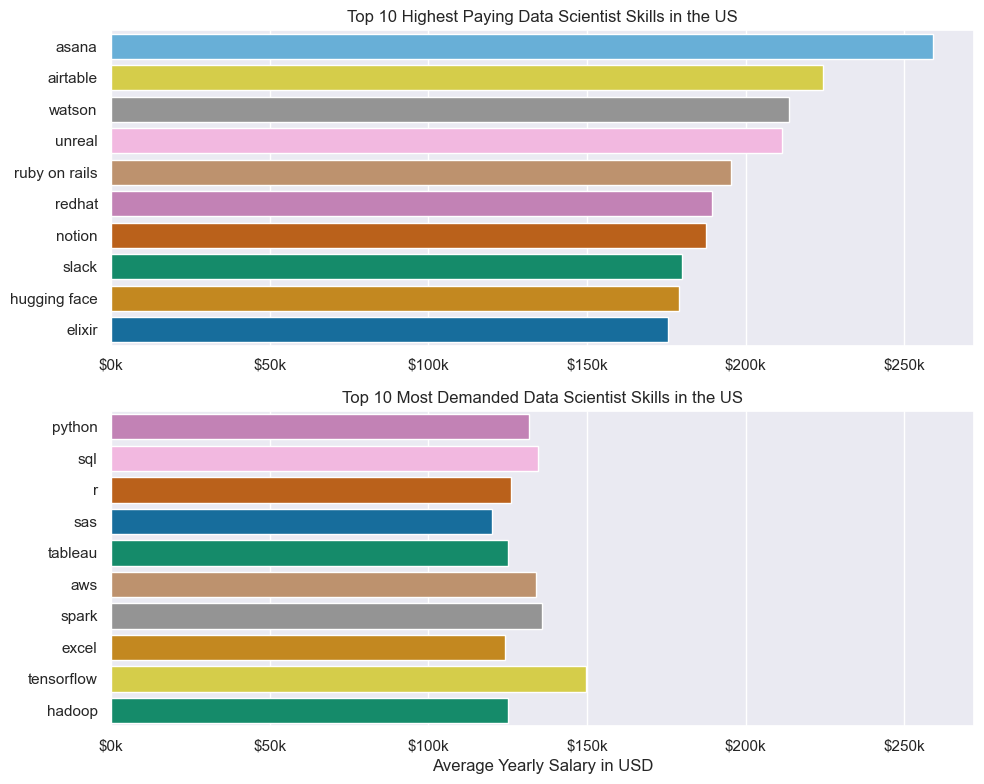

In [102]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))   # Adjust figsize as needed

# ax[0]t box ax[0]t

sns.barplot(data=top_paying_skills, x='median', y=top_paying_skills.index, ax=axes[0],  palette='colorblind', hue='median')
axes[0].legend().remove()
axes[0].set_xlabel('')
axes[0].set_ylabel('')  # Set y-axis label
axes[0].set_title('Top 10 Highest Paying Data Scientist Skills in the US')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

sns.barplot(data=top_trending_skills, x='median', y=top_trending_skills.index, ax=axes[1],  palette='colorblind', hue='median')
axes[1].legend().remove()
axes[1].set_xlabel('Average Yearly Salary in USD')
axes[1].set_ylabel('')  # Set y-axis label
axes[1].set_title('Top 10 Most Demanded Data Scientist Skills in the US')
axes[1].set_xlim(axes[0].get_xlim())
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.tight_layout()
plt.show()